In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tech_team_train.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  int64  
 1   StockCode    200000 non-null  int64  
 2   Description  200000 non-null  int64  
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   200000 non-null  float64
 7   Country      200000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


<h3> DATA CLEANING </h3

In [5]:
# Checking for missing values 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Most of the columns are already cleaned, so let's tackle the InvoiceDate column now

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo               int64
StockCode               int64
Description             int64
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                 int64
dtype: object

In [15]:
# Adding a few more columns to our dataset 

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

In [23]:
df['WeekDay'] = df['InvoiceDate'].dt.day
df.drop('WeekDay', axis = 1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Minute
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,16,54
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,7,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,13,20
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,12,7
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35,2011,5,10,29
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,2011,7,14,21
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,2011,11,10,49
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,2011,3,13,3


In [108]:
df.insert(loc=10, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,5,16,54,6,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,3,7,35,11,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,7,13,20,20,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,2,12,7,22,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,5,9,0,6,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05 11:49:00,1.25,13435.0,35,2011,8,5,11,49,5,30.00
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,2011,7,3,14,21,27,12.48
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,2011,11,5,10,49,11,7.50
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,2011,3,5,13,3,11,0.85


In [109]:
# Removing negative values from Quantity

df = df[df.Quantity > 0]
df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
count,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000
mean,9721.527981,1571.475994,2024.176786,12.958714,3.071526,15294.397827,32.844120,2010.934419,7.613395,3.614335,12.722347,30.451582,15.052488,21.907364
std,5383.747749,842.702551,1090.849985,175.027969,16.211382,1715.207156,6.714057,0.247548,3.415158,1.926200,2.279259,17.065284,8.658736,188.171247
min,0.000000,0.000000,0.000000,1.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000,7.000000,0.000000,1.000000,0.000000
25%,4951.000000,936.000000,1141.000000,2.000000,1.250000,13968.000000,35.000000,2011.000000,5.000000,2.000000,11.000000,16.000000,7.000000,4.680000
50%,10117.000000,1522.000000,1987.000000,6.000000,1.950000,15157.000000,35.000000,2011.000000,8.000000,3.000000,13.000000,31.000000,15.000000,11.800000
75%,14424.000000,2106.000000,2949.000000,12.000000,3.750000,16804.000000,35.000000,2011.000000,11.000000,5.000000,14.000000,45.000000,22.000000,19.800000
max,18535.000000,3683.000000,3895.000000,74215.000000,4161.060000,18287.000000,36.000000,2011.000000,12.000000,7.000000,20.000000,59.000000,31.000000,77183.600000


In [110]:
# Adding another column for the total amount spent 

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [111]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,5,16,54,6,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,3,7,35,11,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,7,13,20,20,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,2,12,7,22,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,5,9,0,6,19.80


<h3>EXPLORATORY DATA  ANALYSIS</h3>

In [112]:
# Let's see in which year was the data collected
df.groupby(by = ['Year'])['Quantity'].sum()

Year
2010     149820
2011    2385980
Name: Quantity, dtype: int64

Our data was collected in the years 2010 and 2011

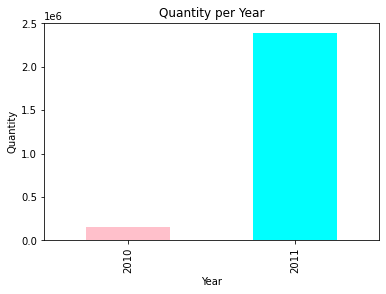

In [113]:
df.groupby(by = ['Year'])['Quantity'].sum().plot.bar(color = ['pink','cyan'])
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.title("Quantity per Year")
plt.show()

We can clearly see that more products were sold in 2011.

<h5> InvoiceDate </h5>



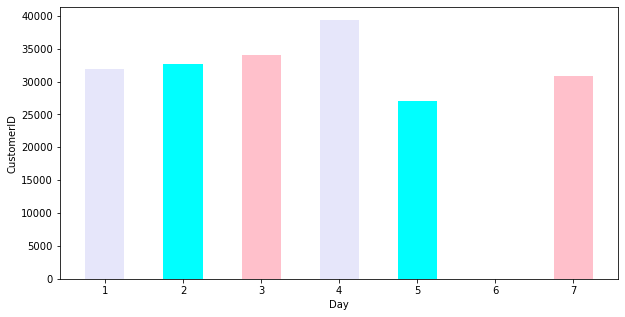

In [115]:
# Now let's see which day had the highest number of sales 

my_dict=(df['Day'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Day','CustomerID']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Day'],count['CustomerID'],color=['lavender', 'pink', 'cyan'],width=0.5)
plt.xlabel("Day")
plt.ylabel("CustomerID")
plt.show()

Since there are zero records for Saturday, we analyse for all other days. Here, we can see that the number of customers on Wednesday is the highest.

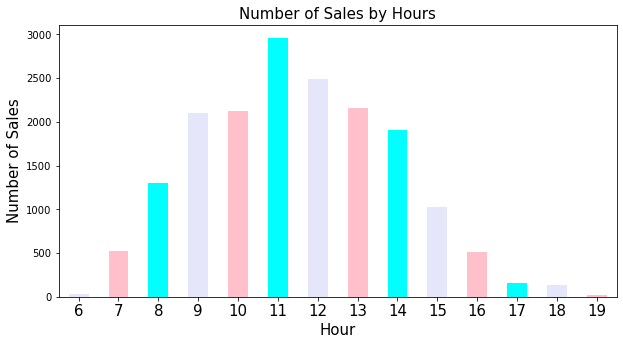

In [106]:
# Now let's see what hours of the day has most number of sales 

ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',color=['lavender', 'pink', 'cyan'], figsize=(10,5))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Sales',fontsize=15)
ax.set_title('Number of Sales by Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

It can be clearly seen that the most number of sales occur between 11:00 AM - 01:00 PM

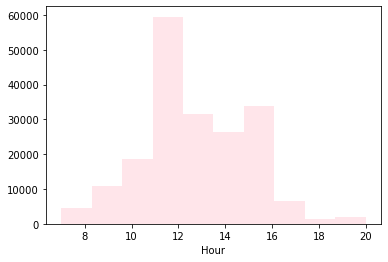

In [105]:
sns.distplot(df['Hour'], kde = False, color ='pink', bins = 10)

<h5> Country </h5>

In [47]:
# Top 5 Countries 
con = df.groupby(by = ['Country'], as_index=False )['TotalAmount'].sum()
con = con.sort_values(by='TotalAmount', ascending=False).head()
con

,Country,TotalAmount
35,35,3496635.634
23,23,139087.610
10,10,128051.380
14,14,114179.000
13,13,106416.340


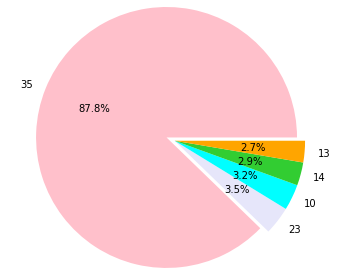

In [48]:
country = con['Country'].tolist()
amount = con['TotalAmount'].tolist()

plt.axis("equal")
plt.pie(amount,labels = country, radius = 1.5, autopct = '%0.1f%%', explode = [0.1,0,0,0,0], colors = ['pink', 'lavender', 'cyan','limegreen','orange'])
plt.show()

We can see that the highest amount of money was spent by customers from country code 35.

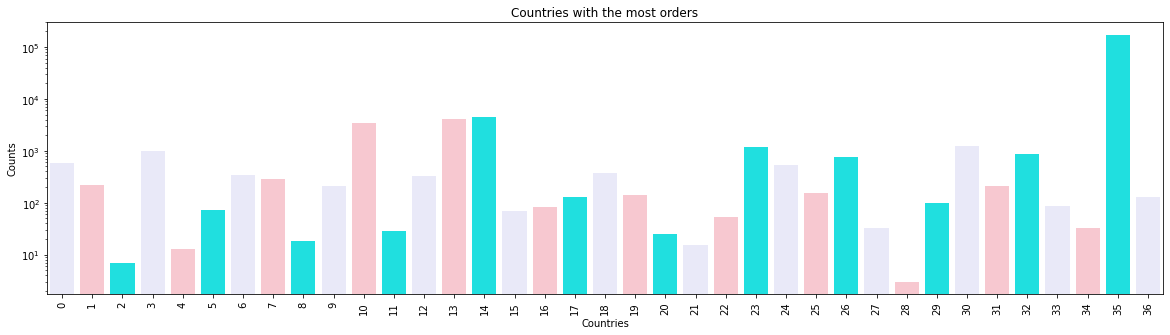

In [49]:
count = df['Country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(count.index, count.values, palette=['lavender', 'pink', 'cyan'] )
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.title("Countries with the most orders")
plt.xticks(rotation=90);
plt.yscale("log")

In [34]:
df['Country'].value_counts(normalize = True).head(1)

35    0.890445
Name: Country, dtype: float64

Almost 90% of the sales are from country 35, it clearly shows that the retailer should focus more on customers from this country. 

In [36]:
# Let us filter out the customer IDs from country 35 

df_35 = df[(df['Country']==35) & (df['CustomerID']!=-1)]
df_35.reset_index(drop=True, inplace = True)


In [39]:
df_35['UnitPrice'].describe().round(2)

count    174245.00
mean          2.92
std           9.06
min           0.00
25%           1.25
50%           1.95
75%           3.75
max        1599.26
Name: UnitPrice, dtype: float64

Around 75% of the products sold have Unit price of 3.75.

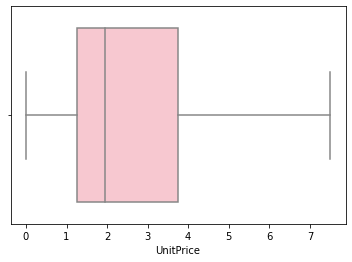

In [42]:
# lets plot a boxplot without statistical outliers

sns.boxplot(df_35['UnitPrice'], showfliers = False, color = 'pink')

<h5> Customers </h5>

In [62]:
# Top 5 customers 
cust = df.groupby(by = ['CustomerID', 'Country'], as_index=False)['TotalAmount'].sum()
cust.sort_values(by='TotalAmount', ascending=False).head()

,CustomerID,Country,TotalAmount
1676,14646.0,23,136418.78
4146,18102.0,35,125960.37
3683,17450.0,35,104518.12
0,12346.0,35,77183.60
1864,14911.0,10,72659.46


The top 3 customers are from countries: 23,35 and 10. Among these, customers from country 23 spent the highest amount of money and most of the customers are from country 35. 

In [66]:
# Based on any determined time period such as Daily, Weekly or Yearly, we can classify them as new or Regular.

# Lets classify the customers based on months.

cust_type=df_35.drop_duplicates(['InvoiceNo','CustomerID'])
cust_type.reset_index(drop=True, inplace = True)
cust_type.loc[:,'Type']=np.nan


for cust in cust_type['CustomerID'].unique():
    cust_type.loc[cust_type[cust_type['CustomerID']==cust].index,'Type']='Regular'
    cust_type.loc[cust_type[cust_type['CustomerID']==cust].index[0],'Type']='New'

cust_type.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Minute,WeekDay,TotalAmount,Type
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,16,54,6,11.25,New
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,7,35,11,11.70,New
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,13,20,20,23.80,New
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,12,7,22,0.83,New
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,9,0,6,19.80,New


In [75]:
# Creating a new column for date time (Year-month)

cust_type.loc[:,'YM']=cust_type.InvoiceDate.dt.strftime("%Y-%m")

# Creating a dataframe from dictionary of monthly new and repeat customers

time = {}
for date in cust_type['YM'].unique():
    time[date]=(cust_type[cust_type['YM']==date].drop_duplicates(['CustomerID','Type'])['Type'].value_counts())
monthly_cust=pd.DataFrame(time).transpose()


In [82]:
cust_type.groupby(by = ['Type'])['TotalAmount'].sum()

Type
New        199015.060
Regular    525626.951
Name: TotalAmount, dtype: float64

There is a drastic difference in the amount spent by the regular customers and the new customers

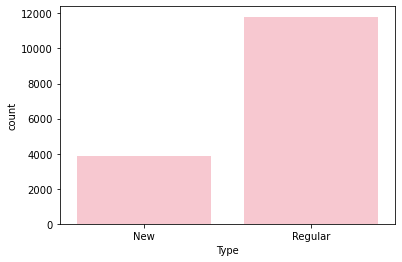

In [81]:
sns.countplot(x ='Type', data = cust_type ,color="pink")

We can see that the count of new customers is remarkably low. The retailer should focus more on the regular customers an improve on marketing strategies to attract more new customers

<h5> Description </h5>

In [92]:
desc = df.groupby(by = ['Description'], as_index=False)['Quantity'].sum()
desc.sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
1907,2002,76097
3624,3805,24982
1687,1771,23386
207,217,16234
2480,2612,16178


Product 2002 was sold the most